<a href="https://colab.research.google.com/github/abhipise2704/Blogs_Articles/blob/main/Home_Credit_Default_Risk_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Download the Data from Kaggle**

In [4]:
# !curl --header 'Host: storage.googleapis.com' --header 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' --header 'Accept-Language: en-GB,en-US;q=0.9,en;q=0.8' --header 'Referer: https://www.kaggle.com/' 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1729742878&Signature=XGeECSQ4OzR0XGMGt3%2B9qJROveov4qgi2HrYP3A0oNxzq4isPrhd0Z%2Bf%2BggNM08FzgnpotUrKoO%2BNppXL3c2r8GCIp9J0NXI0VpvAkbj4gRn27tZlk1lsFXAGsrB99kB7zDtyBacwkJAvAmyIsIAVpB6F6HoeGzFcl6c2XeSPK6v6gXGKcl%2B596pudcaqyIPCNT%2FhSbLFA4mMXq4MIsfoC9cpuD4SCZUCwRukYRYtk2eS8g8BFGBOf9WFw40svHSv3yNMSTBVAwpNbddVyT4VBGPfCDgzgvvv541cmB5Mq7TQlc5X2Sm7M6tvF6zSGytSPe8e0V%2BB0%2FxqWdh%2FvTclg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip' -L -o 'home-credit-default-risk.zip'

In [5]:
# import zipfile
# with zipfile.ZipFile("/content/home-credit-default-risk.zip","r") as zip_ref:
#     zip_ref.extractall("/content/")

# **2.EDA: Exploatory Data Analysis**

In [6]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 2.1 Read the data

In [7]:
import pandas as pd
df=pd.read_csv("/content/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2.2 Number Datapoints & Columns in the Dataset

In [8]:
print("="*80)
print("Total no rows in the Data:",df.shape[0])
print("-"*80)
print("Total no Columns in the Data:",df.shape[1])
print("="*80)

Total no rows in the Data: 307511
--------------------------------------------------------------------------------
Total no Columns in the Data: 122


## 2.3 Column Names & Datatype of Columns

In [9]:
import pprint

print("="*80)
print("Columns Names as follows")
print("-"*80)
pprint.pp(list(df),compact=True)
print("="*80)

Columns Names as follows
--------------------------------------------------------------------------------
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOU

In [10]:
df.dtypes.value_counts()

,count
float64,65
int64,41
object,16


## 2.4 Null Value Check & Missing Value

In [11]:
pd.DataFrame(df.isna().sum()/len(df)*100,
             columns=['nulls']).sort_values(by='nulls',ascending=False)

,nulls
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953


## 2.5 Distribution of Column Gender

In [12]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'Distribution of Column Gender'}, xlabel='CODE_GENDER'>

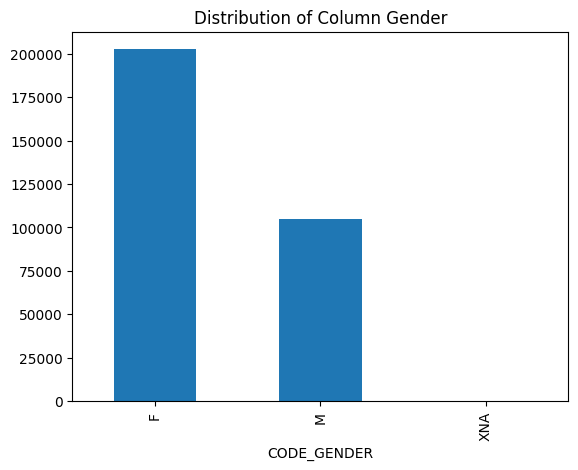

In [13]:
# pd.options.plotting.backend = "plotly"
df['CODE_GENDER'].value_counts().plot(kind='bar',title="Distribution of Column Gender")

### Observations  
* There more Female Home loan borrower in the dataset

## 2.6 Distibution of Target Label

<Axes: title={'center': 'Distribution of TARGET LABEL'}, xlabel='TARGET'>

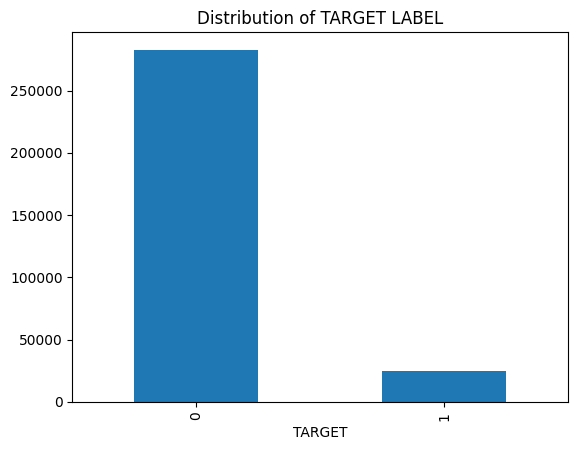

In [14]:
df['TARGET'].value_counts().plot(kind='bar',title="Distribution of TARGET LABEL")

### Observation:
* Data is highly imbalanced as 91.92% point belongs to zero label data---non risky (credit worthy)
* 8% belongs to Labelled as 1 data---risky (non credit worthy)

## 2.7 Gender wise Distribution by the Target Label

In [15]:
df.groupby(['TARGET',
            'CODE_GENDER']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

TARGET  TARGET  CODE_GENDER
0       0       F              66.603228
                M              33.395357
                XNA             0.001415
1       1       F              57.079557
                M              42.920443
dtype: float64

### Observation:
* If label is 1 then 57.07% Females have problems while repaying the Home Loan
* if Label is 1 then 42.92% Males have problems while repaying the Home Loan

## 2.8 Which loan type(NAME_CONTRACT_TYPE) is likely more Risky

In [16]:
df.groupby(['TARGET',
            'NAME_CONTRACT_TYPE']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

TARGET  TARGET  NAME_CONTRACT_TYPE
0       0       Cash loans            90.209986
                Revolving loans        9.790014
1       1       Cash loans            93.538771
                Revolving loans        6.461229
dtype: float64

### Observation:
* If label is 1 then is 93.53% Cash Loans are have problems while repaying the Home Loan
* If label is 1 then 6.46 Revolving loans are have problems while repaying the Home Loan

## 2.9 Education Type & Target Labels

In [17]:
df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pd.DataFrame(df.groupby(['TARGET',
            'NAME_EDUCATION_TYPE']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()))

0
TARGET TARGET NAME_EDUCATION_TYPE                     
0      0      Academic degree                 0.056954
              Higher education               25.064559
              Incomplete higher               3.327013
              Lower secondary                 1.202394
              Secondary / secondary special  70.349080
1      1      Academic degree                 0.012085
              Higher education               16.149043
              Incomplete higher               3.512588
              Lower secondary                 1.679758
              Secondary / secondary special  78.646526

### Observation:
* If label is 1(Risky) & education type is Secondary / secondary special then 78.64%
* If label is 1 (Risky) & 6.46 Education type then Higher education 16.14% are house.

## 2.10 Counts of Occupation type in the Dataset

<Axes: title={'center': 'Counts of Occupation type who borrowed loan'}, xlabel='OCCUPATION_TYPE'>

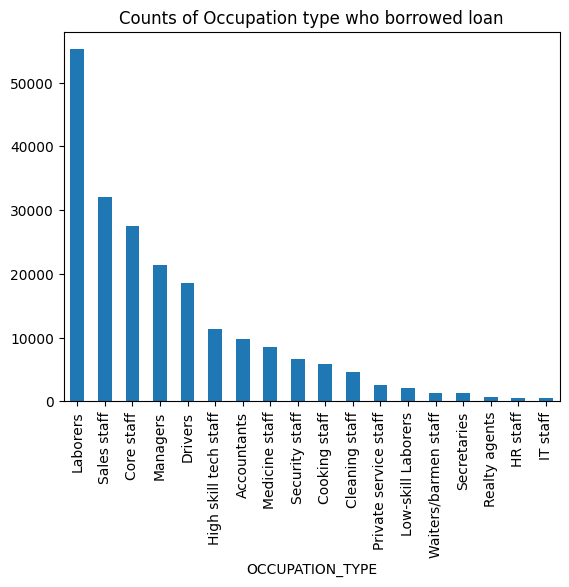

In [19]:
df['OCCUPATION_TYPE'].value_counts().plot(kind='bar',
                                          title="Counts of Occupation type who borrowed loan")

### Observation:
* Loan Borrowers 26.13% are Laborers followed by Sales staff 15%
* Least is IT Staff 0.29%

## 2.11 Percentwise Distribution of Income Type NAME_INCOME_TYPE

In [20]:
df['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

,proportion
NAME_INCOME_TYPE,
Working,51.631974
Commercial associate,23.289248
Pensioner,18.003258
State servant,7.057634
Unemployed,0.007154
Student,0.005853
Businessman,0.003252
Maternity leave,0.001626


## 2.12 Distribution of AMT_INCOME_TOTAL using BoxPlot

<Axes: >

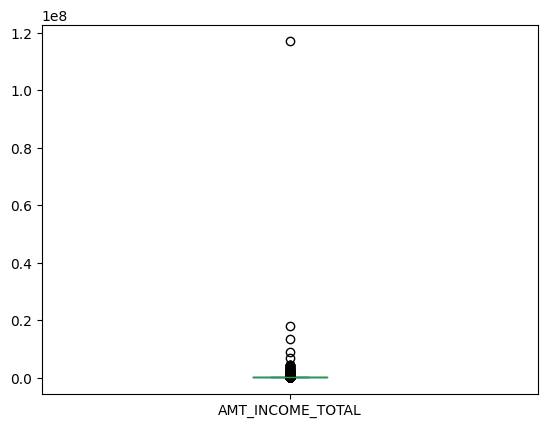

In [21]:
# AMT_INCOME_TOTAL
df['AMT_INCOME_TOTAL'].plot(kind='box')

# **3. Data Preprocessing & Feature Engineering**

## 3.1 Missing value column selection based on 0.55 threshold

In [22]:
print("="*80)
print("Shape of Data set before removing null columns",df.shape)
print("-"*80)

th=len(df)*0.55

df.dropna(thresh=th,axis=1,inplace=True)


print("Shape of Data set After removing null columns based on Thresold",df.shape)
print("="*80)


Shape of Data set before removing null columns (307511, 122)
--------------------------------------------------------------------------------
Shape of Data set After removing null columns based on Thresold (307511, 73)


## 3.2 Different Column types

In [23]:
print("="*80)
for i in set(df.dtypes):
    if i==object:
        print(f"Categorical Columns in the Dataset")
        print("-"*80)
        categorical_columns=list(df.select_dtypes([i]).columns)
        pprint.pp(categorical_columns,compact=True)
    elif (str(i)=='float64'):
        print(f"Numerical Columns float64 in the Dataset")
        print("-"*80)
        numerical_columns_float=list(df.select_dtypes([i]).columns)
        pprint.pp(numerical_columns_float,compact=True)
    elif (str(i)=='int64'):
        print(f"Numerical Columns int64 in the Dataset")
        print("-"*80)
        numerical_columns_int=list(df.select_dtypes([i]).columns)
        pprint.pp(numerical_columns_int,compact=True)
    print("="*80)

Numerical Columns int64 in the Dataset
--------------------------------------------------------------------------------
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
Categorical Columns in the Dataset


## 3.3 Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

X=df.drop(labels='TARGET',axis=1)
y=df['TARGET']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

## 3.4 Missing Value Imputation & Outlier Imputations

### 3.4.1 Missing Value Imputation for Categorical Columns

In [26]:
X_train["CODE_GENDER"].mode()[0]

'F'

In [27]:
for i in categorical_columns:
    mode_train=X_train[i].mode()[0]
    X_train[i].fillna(mode_train,inplace=True)
    X_test[i].fillna(mode_train,inplace=True)

### 3.4.2 Outlier Imputation for Numerical Columns

* `For numerical Columns Winsorization technique is used to impute with Outliers`

In [28]:
numerical_columns=numerical_columns_float+numerical_columns_int
numerical_columns.remove("TARGET")
numerical_columns.remove("SK_ID_CURR")

In [29]:

for colummn_name in numerical_columns:
    upper_train=X_train[colummn_name].quantile(0.95)
    lower_train=X_train[colummn_name].quantile(0.05)

    X_train.loc[X_train[colummn_name]>upper_train,colummn_name]=upper_train
    X_train.loc[X_train[colummn_name]<lower_train,colummn_name]=lower_train

    X_test.loc[X_test[colummn_name]>upper_train,colummn_name]=upper_train
    X_test.loc[X_test[colummn_name]<lower_train,colummn_name]=lower_train

### 3.4.3 Missing value Imputation for Numerical Columnns using mean technique

In [30]:
X_train['AMT_INCOME_TOTAL'].mean()

163124.92016180372

In [31]:
for i in numerical_columns:
    mean_train=X_train[i].mean()
    X_train[i].fillna(mean_train,inplace=True)

    X_test[i].fillna(mean_train,inplace=True)

## 3.5 Feature Scaling using StandarScaler for Numerical Columns

In [32]:
from sklearn.preprocessing import StandardScaler
numerical_cols=X_train.select_dtypes(include=['int64','float64']).columns
scaler=StandardScaler()
X_train[numerical_cols]=scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols]=scaler.transform(X_test[numerical_cols]) # transfrom only for test data

## 3.6 Featuring the Categorical Columns using One hot encoding

In [33]:
# https://datascience.stackexchange.com/questions/71804/how-to-perform-one-hot-encoding-on-multiple-categorical-columns
# array_hot_encoded = ohe.fit_transform(data[categorical_cols])
# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=data.index)
# data_other_cols = data.drop(columns=categorical_cols)

# data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [34]:
from sklearn.preprocessing import OneHotEncoder

print("="*80)
print("Train shape before one hot encoding",X_train.shape)
print("-"*80)
print("Test shape before one hot encoding",X_test.shape)
print("="*80)

cat_columns=X_train.select_dtypes(include=['object']).columns
encoder=OneHotEncoder(sparse_output=False,drop='first')

X_train_ohe=encoder.fit_transform(X_train[cat_columns])
X_train_encoded = pd.DataFrame(X_train_ohe,
                               columns=encoder.get_feature_names_out(cat_columns),
                               index=X_train.index)
X_train=X_train.drop(cat_columns,axis=1)
X_train=pd.concat([X_train,X_train_encoded],axis=1)


X_test_ohe = encoder.transform(X_test[cat_columns])
X_test_encoded = pd.DataFrame(X_test_ohe,
                               columns=encoder.get_feature_names_out(cat_columns),
                               index=X_test.index)
X_test=X_test.drop(cat_columns,axis=1)
X_test=pd.concat([X_test,X_test_encoded],axis=1)


print("="*80)
print("Train shape after one hot encoding",X_train.shape)
print("-"*80)
print("Test shape after one hot encoding",X_test.shape)
print("="*80)

Train shape before one hot encoding (246008, 72)
--------------------------------------------------------------------------------
Test shape before one hot encoding (61503, 72)
Train shape after one hot encoding (246008, 172)
--------------------------------------------------------------------------------
Test shape after one hot encoding (61503, 172)


# **4 Model Building & Model Training**

## 4.1 Model 1 : Logistic Regression

### 4.1.1 Logistic Regression Model Training and Evaluation: Precision & Recall

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score

lr_model=LogisticRegression(class_weight='balanced')
lr_model.fit(X_train.values,y_train.values)

predictions_train=lr_model.predict(X_train.values)
predictions_test=lr_model.predict(X_test.values)

print("="*80)
print("Precision Train:",precision_score(y_train,predictions_train))
print("Recall Train:",recall_score(y_train,predictions_train))
print("-"*80)
print("Precision Test:",precision_score(y_test,predictions_test))
print("Recall Test:",recall_score(y_test,predictions_test))
print("="*80)


Precision Train: 0.1588749524895477
Recall Train: 0.6735146022155085
--------------------------------------------------------------------------------
Precision Test: 0.15903247309780022
Recall Test: 0.6727089627391742


### 4.1.2 Confusion Matrix of Logistic Model

Text(0.5, 1.0, 'LR Test Confusion Matrix')

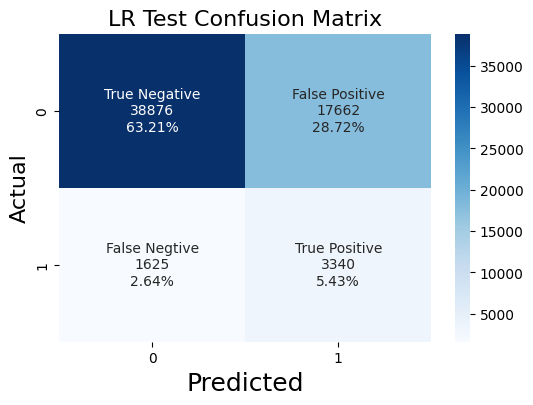

In [36]:
cf_matrix_test =confusion_matrix(y_test,predictions_test)
plt.figure(figsize=(6,4))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('LR Test Confusion Matrix',fontsize=16)

### 4.1.3 Model Explainabilty using Shap Plot

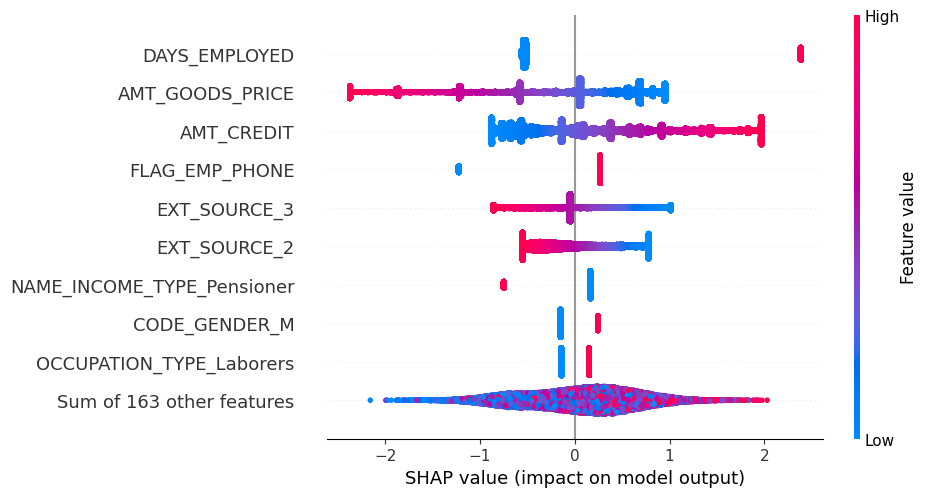

In [37]:
import shap
import matplotlib.pyplot as plt

explainer = shap.LinearExplainer(lr_model,X_test)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

## 4.2  Model 2: Random Forest

### 4.2.1 Random Forest Model Training & Evaluation Precision & Recall

### 4.2.2 Confusion Matrix Random Forest

## 4.3 Model 3: Light Gradient Boosted Machine

### 4.3.1 LGBM Training & Evaluation: Precision & Recall

In [38]:
import lightgbm as lgbm
lgb = lgbm.LGBMClassifier(n_estimators=30,
                          max_depth=8,
                          learning_rate=0.1,
                          subsample=0.65,
                          class_weight='balanced',
                          random_state=27)
lgb.fit(X_train.values, y_train.values)
predictions_train = lgb.predict(X_train.values)
print("="*80)
print("Precision Train:",precision_score(y_train,predictions_train))
print("-"*80)
print("Recall Train:",recall_score(y_train,predictions_train))
print("="*80)

predictions_test = lgb.predict(X_test.values)
print("="*80)
print("Precision Test:",precision_score(y_test,predictions_test))
print("-"*80)
print("Recall Test:",recall_score(y_test,predictions_test))
print("="*80)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3304
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Precision Train: 0.16192204143743416
--------------------------------------------------------------------------------
Recall Train: 0.6965256797583081
Precision Test: 0.1592733417828475
--------------------------------------------------------------------------------
Recall Test: 0.6833836858006043


### 4.3.2 Confusion Matrix LGBM

Text(0.5, 1.0, 'LR Test Confusion Matrix')

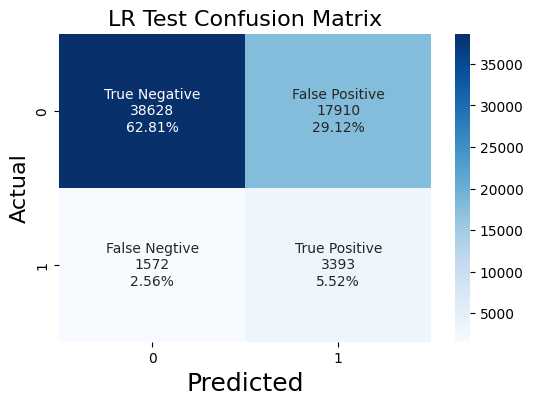

In [39]:
cf_matrix_test =confusion_matrix(y_test,predictions_test)
plt.figure(figsize=(6,4))
group_names = ['True Negative','False Positive','False Negtive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_test.flatten()/np.sum(cf_matrix_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.title('LR Test Confusion Matrix',fontsize=16)

### 4.3.3 Model Explainalbilty using Shape Plot

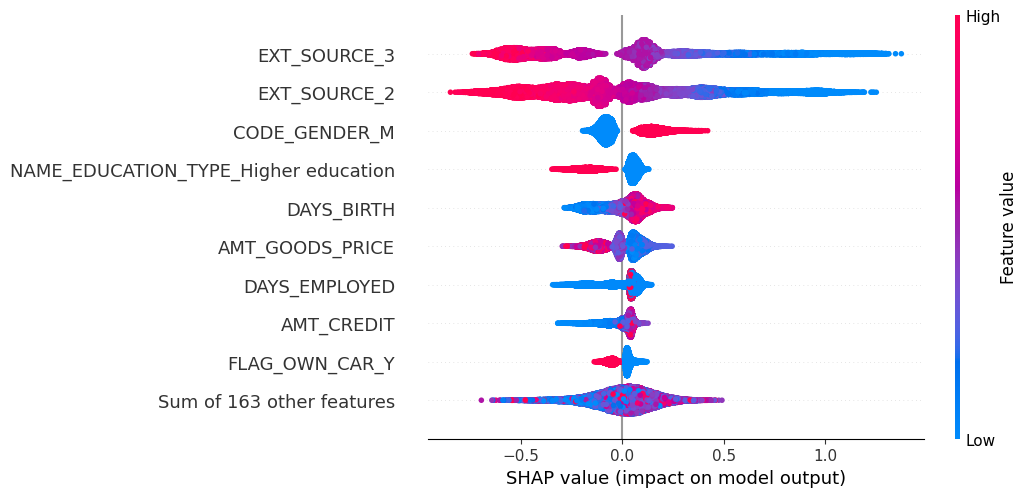

In [40]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(lgb)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

### 4.3.4 Feature Importance using LGBM

Top 20 Features:
Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED', 'AMT_CREDIT', 'CODE_GENDER_M', 'AMT_ANNUITY',
       'NAME_EDUCATION_TYPE_Higher education', 'DAYS_ID_PUBLISH',
       'FLAG_DOCUMENT_3', 'NAME_CONTRACT_TYPE_Revolving loans',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_OWN_CAR_Y',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_FAMILY_STATUS_Married',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_INCOME_TYPE_Working',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'DAYS_REGISTRATION',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'REG_CITY_NOT_LIVE_CITY',
       'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
       'OCCUPATION_TYPE_Core staff', 'FLAG_WORK_PHONE',
       'REG_CITY_NOT_WORK_CITY'],
      dtype='object')


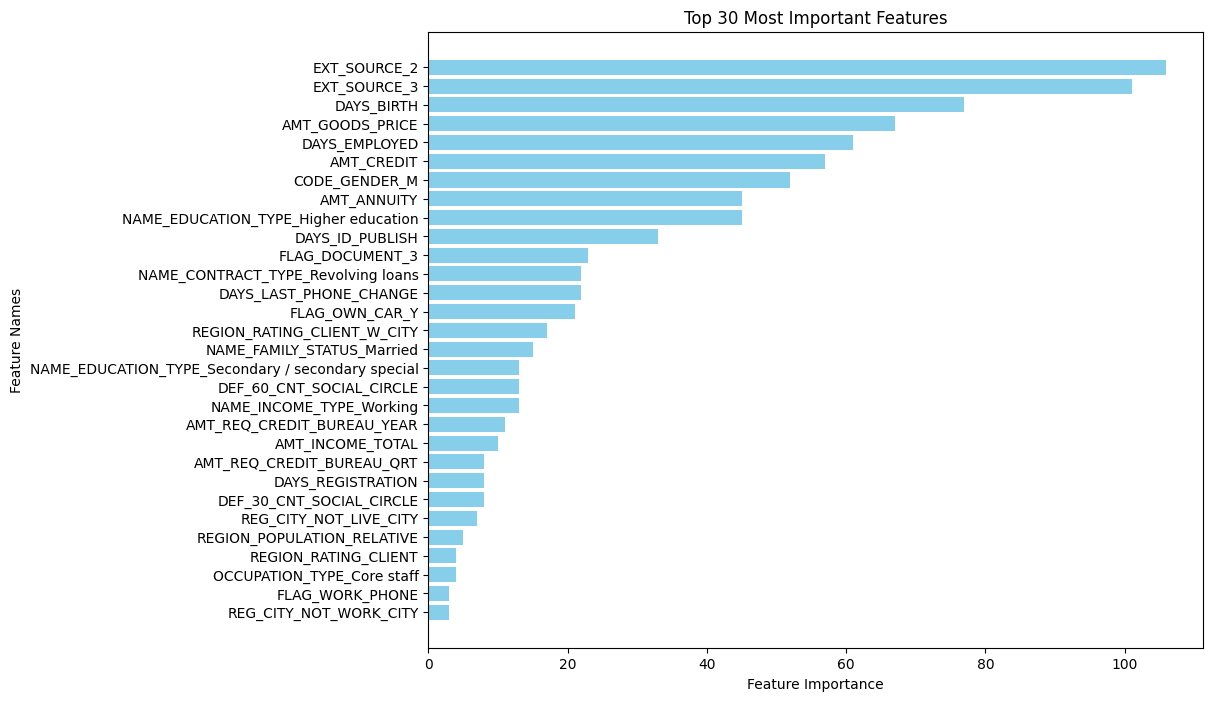

In [41]:
feature_importances=lgb.feature_importances_
sorted_indices= feature_importances.argsort()[::-1]

top_feature_names = X_train.columns[sorted_indices[:30]]
top_feature_importances = feature_importances[sorted_indices[:30]]
print("Top 20 Features:")
print(top_feature_names)

plt.figure(figsize=(10, 8))
plt.barh(top_feature_names, top_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top 30 Most Important Features')
plt.gca().invert_yaxis()

## 4.4 Model 4: Feature Selected Model with LGBM

### 4.4.1 Feature Selection

### 4.4.2 LGBM Training

# **5 Conclusion**

In [42]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Sr.no.", "Model",
                 "Train Precision","Test Precision",
                 "Train Recall","Test Recall"]

x.add_row(["1","LR", "0.1588", "0.159", "0.6735","0.6727"])
x.add_row(["2","LGBM", "0.1619", "0.1592", "0.6965","0.6833"])
print(x)

+--------+-------+-----------------+----------------+--------------+-------------+
| Sr.no. | Model | Train Precision | Test Precision | Train Recall | Test Recall |
+--------+-------+-----------------+----------------+--------------+-------------+
|   1    |   LR  |      0.1588     |     0.159      |    0.6735    |    0.6727   |
|   2    |  LGBM |      0.1619     |     0.1592     |    0.6965    |    0.6833   |
+--------+-------+-----------------+----------------+--------------+-------------+
